In [19]:
# Get OpenAI api key
import getpass
import os

if not os.environ.get("OPENAI_API_KEY"):
  os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter API key for OpenAI: ")

# Model

In [20]:
from langchain.chat_models import init_chat_model

llm = init_chat_model("gpt-4o-mini", model_provider="openai")

# Embedding Model

In [21]:
import getpass
import os

if not os.environ.get("OPENAI_API_KEY"):
  os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter API key for OpenAI: ")

In [22]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

# Vector Store

In [23]:
from langchain_core.vectorstores import InMemoryVectorStore

vector_store = InMemoryVectorStore(embeddings)

## Api key de langsmith

In [24]:
os.environ["LANGSMITH_TRACING"] = "true"
if not os.environ.get("LANGSMITH_API_KEY"):
    os.environ["LANGSMITH_API_KEY"] = getpass.getpass()

# Chains

# WebLoader

In [26]:
url_admisiones_pregrado = "https://admisiones.unal.edu.co/pregrado/"
# Informacion para aspirantes
url_admisiones_pregrado_admision_a_pregrado = "https://admisiones.unal.edu.co/pregrado/admision-a-pregrado/"
url_admisiones_prueba_especifica = "https://admisiones.unal.edu.co/pregrado/admision-a-los-programas-curriculares-con-prueba-especifica-musica-musica-instrumental-artes-plasticas-y-cine-y-television/"
url_admisiones_aspirantes_discapacidad = "https://admisiones.unal.edu.co/pregrado/aspirantes-con-discapacidad/"
url_admisiones_exalumnos = "https://admisiones.unal.edu.co/pregrado/exalumnos-de-la-universidad-nacional-de-colombia/"
url_admisiones_fuera_de_colombia = "https://admisiones.unal.edu.co/pregrado/aspirantes-que-se-encuentran-fuera-de-colombia/"
url_admisiones_extranjeros = "https://admisiones.unal.edu.co/pregrado/aspirantes-extranjeros-que-desean-estudiar-en-la-universidad/"
# Programas de Admisión Especial (PAES)
url_admisiones_comunidad_indigena = "https://admisiones.unal.edu.co/pregrado/comunidades-indigenas/"
url_admisiones_mejores_bachilleres = "https://admisiones.unal.edu.co/pregrado/mejores-bachilleres/"
url_admisiones_mejores_bachilleres_municipios_pobres = "https://admisiones.unal.edu.co/pregrado/mejores-bachilleres-de-municipios-pobres/"
url_admisiones_mej_bachill_negra_afrocol_palenquera_raizal = "https://admisiones.unal.edu.co/pregrado/mejores-bachilleres-de-poblacion-negra-afrocolombiana-palenquera-y-raizal/"
url_admisiones_victimas_conflicto = "https://admisiones.unal.edu.co/pregrado/victimas-del-conflicto-armado-interno-en-colombia/"
# Programa Especial de Admisión y Movilidad Académica (PEAMA)
url_admisiones_ama_car_ori_tum = "https://admisiones.unal.edu.co/pregrado/amazonia-caribe-orinoquia-y-tumaco/"
# Programa de Admisión Especial con Enfoque Territorial (PAET)
url_admisiones_paet_manizales = "https://admisiones.unal.edu.co/pregrado/sede-manizales/"
url_admisiones_paet_bogota = "https://admisiones.unal.edu.co/pregrado/sede-bogota/"
# Informacion sobre las pruebas
url_admisiones_prueba_admision = "https://admisiones.unal.edu.co/pregrado/prueba-de-admision/"
url_admisiones_prueba_especifica_instrumental = "https://admisiones.unal.edu.co/pregrado/pruebas-especificas-musica-musica-instrumental-artes-plasticas-y-cine-y-television/"
# Pruebas específicas
url_admisiones_musica = "https://admisiones.unal.edu.co/pregrado/pruebas-especificas-musica-musica-instrumental-artes-plasticas-y-cine-y-television/programa-curricular-de-musica/"
url_admisiones_musica_instrumental = "https://admisiones.unal.edu.co/pregrado/pruebas-especificas-musica-musica-instrumental-artes-plasticas-y-cine-y-television/programa-curricular-de-musica-instrumental/"
url_admisiones_musica_teoria_audicion_lectura = "https://admisiones.unal.edu.co/pregrado/pruebas-especificas-musica-musica-instrumental-artes-plasticas-y-cine-y-television/programa-curricular-de-musica/prueba-teoria-audicion-y-lectura/"
# Artes Plásticas
url_admisiones_artes_bogota = "https://admisiones.unal.edu.co/pregrado/pruebas-especificas-musica-musica-instrumental-artes-plasticas-y-cine-y-television/programa-curricular-de-artes-plasticas-sede-bogota/"
url_admisiones_artes_medellin = "https://admisiones.unal.edu.co/pregrado/pruebas-especificas-musica-musica-instrumental-artes-plasticas-y-cine-y-television/programa-curricular-de-artes-plasticas-sede-medellin/"
# Normativa
url_admisiones_normativa = "https://admisiones.unal.edu.co/pregrado/normativa-pregrado/"
# Paso a paso
url_admisiones_paso_a_paso = "https://admisiones.unal.edu.co/pregrado/guia-paso-a-paso-pregrado/"
# Otras informaciones
url_demostraciones = "https://admisiones.unal.edu.co/pregrado/demostraciones-interactivas/"
url_ofertas_programas = "https://admisiones.unal.edu.co/pregrado/oferta-de-programas-curriculares/"
url_faq = "https://admisiones.unal.edu.co/pregrado/preguntas-frecuentes-pregrado/"


In [28]:
web_paths = (url_admisiones_pregrado,
                url_admisiones_pregrado_admision_a_pregrado,
                url_admisiones_prueba_especifica,
                url_admisiones_aspirantes_discapacidad,
                url_admisiones_exalumnos,
                url_admisiones_fuera_de_colombia,
                url_admisiones_extranjeros,
                url_admisiones_comunidad_indigena,
                url_admisiones_mejores_bachilleres,
                url_admisiones_mejores_bachilleres_municipios_pobres,
                url_admisiones_mej_bachill_negra_afrocol_palenquera_raizal,
                url_admisiones_victimas_conflicto,
                url_admisiones_ama_car_ori_tum,
                url_admisiones_paet_manizales,
                url_admisiones_paet_bogota,
                url_admisiones_prueba_admision,
                url_admisiones_prueba_especifica_instrumental,
                url_admisiones_musica,
                url_admisiones_musica_instrumental,
                url_admisiones_musica_teoria_audicion_lectura,
                url_admisiones_artes_bogota,
                url_admisiones_artes_medellin,
                url_admisiones_normativa,
                url_admisiones_paso_a_paso,
                url_demostraciones,
                url_ofertas_programas,
                url_faq,
             )

In [ ]:
import bs4
from langchain import hub
from langchain_community.document_loaders import WebBaseLoader
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
from typing_extensions import List, TypedDict

bs4_strainer = bs4.SoupStrainer(
    class_=(
        "frame frame-default frame-type-textmedia frame-layout-0", 
        "frame frame-default frame-type-header frame-layout-0"
        ),)


# Load and chunk contents of the blog

from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader(
    web_paths=web_paths, #lista de URLs del portal de admisiones
    bs_kwargs={"parse_only": bs4_strainer},
    bs_get_text_kwargs={"separator": " ", "strip": True},
)
docs = loader.load()

In [39]:
# Contar los caracteres totals de los documentos
total_chars = 0
for doc in docs:
    total_chars += len(doc.page_content)
print(f"Total characters: {total_chars}")

Total characters: 174750


In [31]:
print(f"Total characters: {len(docs[0].page_content)}")

Total characters: 4373


In [33]:
print(docs[0].page_content)

Pregrado Convocatoria de admisión para el periodo 2025-02 FECHAS DEL PROCESO DE ADMISIÓN A PROGRAMAS CURRICULARES 2025-02 Pagar los derechos de inscripción: Del 17 de febrero al 18 de marzo de 2025 Formalizar la inscripción: Del 17 de febrero al 18 de marzo de 2025 Consultar la citación para presentar la prueba de admisión: A partir del 7 de abril de 2025 PRESENTAR LA PRUEBA DE ADMISIÓN: Domingo 27 de abril de 2025 Consultar el puntaje obtenido en la prueba de admisión: 7 de mayo de 2025 Inscribir un programa curricular (Puntaje mayor o igual a 450): Del 7 al 12 de mayo de 2025 CONSULTAR RESULTADOS ADMITIDOS: 15 de mayo de 2025 Si es admitido, enviar los documentos requeridos a la respectiva División de Registro y Matrícula, teniendo en cuenta el calendario establecido: Del 19 al  23 de  mayo de 2025 FECHAS IMPORTANTES PARA ASPIRANTES A PROGRAMAS CON PRUEBAS ESPECÍFICAS * Consultar la citación para presentar las pruebas específicas de Música (Composición, Dirección, Investigación en Pe

In [37]:
# Combine documents from WebBaseLoader and PyPDFLoader
combined_documents = []
combined_documents.extend(docs)

In [41]:
# Contar los caracteres totals de los documentos
total_chars = 0
for doc in combined_documents:
    total_chars += len(doc.page_content)
print(f"Total characters: {total_chars}")

Total characters: 174750


# PDF loader

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

pdf_file_paths = ["source/PRUEBA_ESPECIALIDAD_COMPOSICION.pdf",
              "source/PRUEBA_ESPECIALIDAD_DIRECCION.pdf",
              "source/PRUEBA_ESPECIALIDAD_PEDAGOGIA-2025.pdf",
              "source/PRUEBA_INSTRUMENTO_MUSICA.pdf",]

for pdf_path in pdf_file_paths:
    pdf_loader = PyPDFLoader(pdf_path)
    pdf_documents = pdf_loader.load()
    combined_documents.extend(pdf_documents)

In [ ]:
combined_documents.extend(docs)

In [38]:
from langchain_community.document_loaders import PyPDFLoader

file_path = "source/PRUEBA_ESPECIALIDAD_DIRECCION.pdf"
pdf_file_paths = ["source/PRUEBA_ESPECIALIDAD_COMPOSICION.pdf",
              "source/PRUEBA_ESPECIALIDAD_DIRECCION.pdf",
              "source/PRUEBA_ESPECIALIDAD_PEDAGOGIA-2025.pdf"]

#loaderPDF = PyPDFLoader(file_path)

In [42]:
for pdf_path in pdf_file_paths:
    pdf_loader = PyPDFLoader(pdf_path)
    pdf_documents = pdf_loader.load()
    combined_documents.extend(pdf_documents)

In [ ]:
# Contar los caracteres totals de los documentos combined documents
total_chars = 0
for doc in combined_documents:
    total_chars += len(doc.page_content)
print(f"Total characters: {total_chars}")

Total characters: 178034


Esto generará fragmentos de 2,000 caracteres con un solapamiento de 200 caracteres, resultando en aproximadamente 111 fragmentos.

In [46]:
# Split the documents into smaller chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=180)
all_splits = text_splitter.split_documents(combined_documents)

In [47]:
print(f"Split webs into {len(all_splits)} sub-documents.")

Split webs into 111 sub-documents.


In [49]:
# Storing doments in the vector store
document_ids = vector_store.add_documents(documents=all_splits)

In [117]:
print(document_ids[:3])

['f2fd3b18-62e4-4426-8e78-35fe64461a43', '9f0bb58d-af98-4b30-8241-61b2a4928da6', '58b436a8-c927-4cd1-bc43-e4452068949f']


# Retrieval and generation

## LangGraph

In [130]:
from langgraph.graph import MessagesState, StateGraph

graph_builder = StateGraph(MessagesState)
graph_builder2 = StateGraph(MessagesState)


## Tool decorator

In [119]:
from langchain_core.tools import tool

@tool(response_format="content_and_artifact")
def retrieve(query: str):
    """Retrieve information related to a query."""
    retrieved_docs = vector_store.similarity_search(query, k=2)
    serialized = "\n\n".join(
        (f"Source: {doc.metadata}\n" f"Content: {doc.page_content}")
        for doc in retrieved_docs
    )
    return serialized, retrieved_docs

In [128]:
from langchain_core.messages import SystemMessage
from langgraph.prebuilt import ToolNode


# Step 1: Generate an AIMessage that may include a tool-call to be sent.
def query_or_respond(state: MessagesState):
    """Generate tool call for retrieval or respond."""
    llm_with_tools = llm.bind_tools([retrieve])
    response = llm_with_tools.invoke(state["messages"])
    # MessagesState appends messages to state instead of overwriting
    return {"messages": [response]}


# Step 2: Execute the retrieval.
tools = ToolNode([retrieve])


# Step 3: Generate a response using the retrieved content.
def generate(state: MessagesState):
    """Generate answer."""
    # Get generated ToolMessages
    recent_tool_messages = []
    for message in reversed(state["messages"]):
        if message.type == "tool":
            recent_tool_messages.append(message)
        else:
            break
    tool_messages = recent_tool_messages[::-1]

    # Format into prompt
    docs_content = "\n\n".join(doc.content for doc in tool_messages)
    system_message_content = (
        "Eres un asistente para tareas de respuesta a preguntas para "
        "el proceso de admisión a la Universidad Nacional de Colombia. "
        "Tu nombre es Nachabot. Al iniciar una conversación, di tu nombre "
        "y pregunta al usuario cómo puedes ayudarle en un tono amable. "
        "Usa los siguientes fragmentos de contexto recuperado para "
        "responder la pregunta. Si no sabes la respuesta, di que no "
        "la sabes. Usa un máximo de tres oraciones y mantén la "
        "respuesta concisa."
        "\n\n"
        f"{docs_content}"
    )
    conversation_messages = [
        message
        for message in state["messages"]
        if message.type in ("human", "system")
        or (message.type == "ai" and not message.tool_calls)
    ]
    prompt = [SystemMessage(system_message_content)] + conversation_messages

    # Run
    response = llm.invoke(prompt)
    return {"messages": [response]}

## Graph

In [ ]:
from langgraph.graph import END
from langgraph.prebuilt import ToolNode, tools_condition

graph_builder.add_node(query_or_respond)
graph_builder.add_node(tools)
graph_builder.add_node(generate)

graph_builder.set_entry_point("query_or_respond")
graph_builder.add_conditional_edges(
    "query_or_respond",
    tools_condition,
    {END: END, "tools": "tools"},
)
graph_builder.add_edge("tools", "generate")
graph_builder.add_edge("generate", END)

graph = graph_builder.compile()

In [131]:
from langgraph.graph import END
from langgraph.prebuilt import ToolNode, tools_condition

graph_builder2.add_node(query_or_respond)
graph_builder2.add_node(tools)
graph_builder2.add_node(generate)

graph_builder2.set_entry_point("query_or_respond")
graph_builder2.add_conditional_edges(
    "query_or_respond",
    tools_condition,
    {END: END, "tools": "tools"},
)
graph_builder2.add_edge("tools", "generate")
graph_builder2.add_edge("generate", END)

#graph2 = graph_builder2.compile()

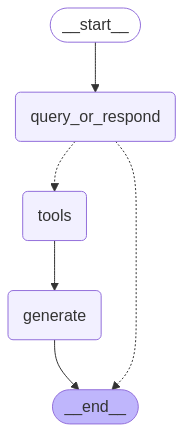

In [136]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

# Stateful management of chat history

In [ ]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()
graph = graph_builder2.compile(checkpointer=memory)

# Specify an ID for the thread
config = {"configurable": {"thread_id": "abc123"}}

In [ ]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()
graph = graph_builder2.compile(checkpointer=memory)

# Specify an ID for the thread
config = {"configurable": {"thread_id": "abc123"}}

while True:
    input_message = input("You: ")
    
    if input_message.lower() == "exit":
        break

    for step in graph.stream(
        {"messages": [{"role": "user", "content": input_message}]},
        stream_mode="values",
        config=config,
    ):
        step["messages"][-1].pretty_print()

================================ Human Message =================================

hola
================================== Ai Message ==================================

¡Hola! ¿Cómo puedo ayudarte hoy?
================================ Human Message =================================

que es el proceso de admision
================================== Ai Message ==================================
Tool Calls:
  retrieve (call_RQmzFUi4JQtcq8KyXDZg87Rn)
 Call ID: call_RQmzFUi4JQtcq8KyXDZg87Rn
  Args:
    query: proceso de admision
================================= Tool Message =================================
Name: retrieve

Source: {'source': 'https://admisiones.unal.edu.co/pregrado/mejores-bachilleres-de-poblacion-negra-afrocolombiana-palenquera-y-raizal/'}
Content: en las bases de datos de la Dirección Nacional de Admisiones. 4. Pasos que deben seguirse para la inscripción 1. Cumplir con los requisitos anteriormente mencionados. 2. Ser autorizados por la institución en el Sistema de la Dir